In [31]:
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("incident_event_log.csv")
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [3]:
# !pip install seaborn

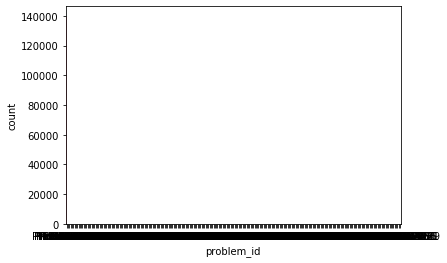

In [4]:
sns.countplot(x = 'problem_id', data = dataset)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


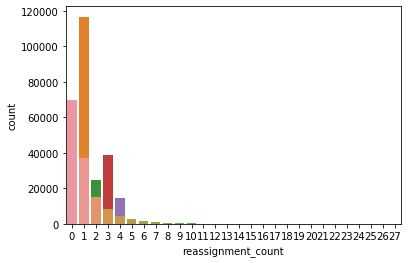

In [5]:
column = [columns for columns in dataset]
for i in range(1,4):
    print(sns.countplot(x = str(column[i]), data = dataset))

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [7]:
dataset.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [8]:
'''df2 = dataset.replace("unknown",np.nan)
df2.head()'''

'df2 = dataset.replace("unknown",np.nan)\ndf2.head()'

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [10]:
dataset = dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"],axis = 1)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [14]:
# define a function, try to find the catogery and its number of each column
from collections import defaultdict

def column_to_list(dataset,name_of_list):
    alist = dataset[name_of_list].tolist()
    return alist

def sum_of_catogery(catogery_list):
    dic = defaultdict(int)
    for a in catogery_list:
        dic[a] += 1
    
    return dic

def df_to_ddic(dataset,column_name):
    a = column_to_list(dataset,column_name)
    dic = sum_of_catogery(a)
    
    return dic

In [15]:
# sort the dictionary by key
def sort_by_key(dd):
    d = dict(dd)
    d = sorted(d.items(), key = lambda item:item[0])

    return d

In [16]:
incident_state_dic = df_to_ddic(dataset, "incident_state")
incident_state_dic

defaultdict(int,
            {'New': 36407,
             'Resolved': 25751,
             'Closed': 24985,
             'Active': 38716,
             'Awaiting User Info': 14642,
             'Awaiting Problem': 461,
             'Awaiting Vendor': 707,
             'Awaiting Evidence': 38,
             '-100': 5})

In [17]:
made_sla_dic = df_to_ddic(dataset,"made_sla")
made_sla_dic, len(made_sla_dic)

(defaultdict(int, {True: 132497, False: 9215}), 2)

In [18]:
contact_type_dic = df_to_ddic(dataset,"contact_type")
contact_type_dic, len(contact_type_dic)

(defaultdict(int,
             {'Phone': 140462,
              'Email': 220,
              'Self service': 995,
              'Direct opening': 17,
              'IVR': 18}),
 5)

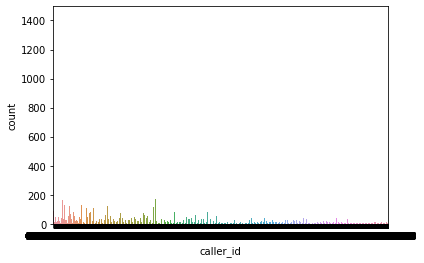

In [19]:
caller_id_ddic = df_to_ddic(dataset,"caller_id")
caller_id_ddic
sns.countplot(dataset["caller_id"])

In [20]:
'''problem_id_ddic = df_to_ddic(dataset,"problem_id")
problem_id_ddic'''

'problem_id_ddic = df_to_ddic(dataset,"problem_id")\nproblem_id_ddic'

In [21]:
column = [columns for columns in dataset]
for i in range(1,len(column)):
    print(len(df_to_ddic(dataset, str(column[i]))))

9
2
28
9
115
2
5245
208
19849
186
11553
846
50664
5
225
59
255
526
3
3
4
79
235
2
2
2
18
217
18506
2707


In [23]:
impact_dict = df_to_ddic(dataset, "impact")
impact_dict

defaultdict(int, {'2 - Medium': 134335, '1 - High': 3491, '3 - Low': 3886})

In [24]:
urgency_dict = df_to_ddic(dataset, "urgency")
urgency_dict

defaultdict(int, {'2 - Medium': 134094, '3 - Low': 3598, '1 - High': 4020})

In [25]:
priority_dict = df_to_ddic(dataset, "priority")
priority_dict

defaultdict(int,
            {'3 - Moderate': 132452,
             '2 - High': 2972,
             '4 - Low': 4030,
             '1 - Critical': 2258})

In [26]:
notify_dict = df_to_ddic(dataset, "notify")
notify_dict

defaultdict(int, {'Do Not Notify': 141593, 'Send Email': 119})

In [27]:
resolved_at_dic = df_to_ddic(dataset, "resolved_at")
r = dict(resolved_at_dic)
r["?"]
# how many "?" values considered as NA does "resolved_at" column have?

3141

In [29]:
closed_at_ddic = df_to_ddic(dataset,"closed_at")

# Dose "closed_at" column have "?" value?
c = dict(closed_at_ddic)
if "?" in c.keys():
    print("True")
else: 
    print("False")

False


## plot the "resolved_at" and "closed_at", try to find the relation between them

In [32]:
# delete the "?" value of "resolved_at" column in dataframe and plot it with "closed_at" column
df2=dataset[~dataset['resolved_at'].isin(["?"])]
len(df2)

138571

In [33]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

False


In [34]:
len(df2)

138571

## Change date and time to timestamps.

In [35]:
import time, datetime
from datetime import datetime

def time2stamp(cmnt_time):   #转时间戳函数
    cmnt_time=datetime.strptime(cmnt_time,'%d/%m/%Y %H:%M')
    stamp=int(datetime.timestamp(cmnt_time))
    return stamp

In [37]:
df2["resolved_at"].head()

0    29/2/2016 11:29
1    29/2/2016 11:29
2    29/2/2016 11:29
3    29/2/2016 11:29
4     1/3/2016 09:52
Name: resolved_at, dtype: object

In [38]:
df2["resolved_at"] = df2["resolved_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df2["closed_at"] = df2["closed_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2["opened_at"] = df2["opened_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
sys_created_at_dic = df_to_ddic(dataset, "sys_created_at")
s = dict(sys_created_at_dic)
s["?"]

53076

In [42]:
sys_updated_at_dic = df_to_ddic(dataset, "sys_updated_at")
#print(sys_updated_at_dic)
s2 = dict(sys_updated_at_dic)
s2["?"]

KeyError: '?'

In [43]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

False


In [44]:
df2["sys_updated_at"] = df2["sys_updated_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
%matplotlib notebook

<IPython.core.display.Javascript object>


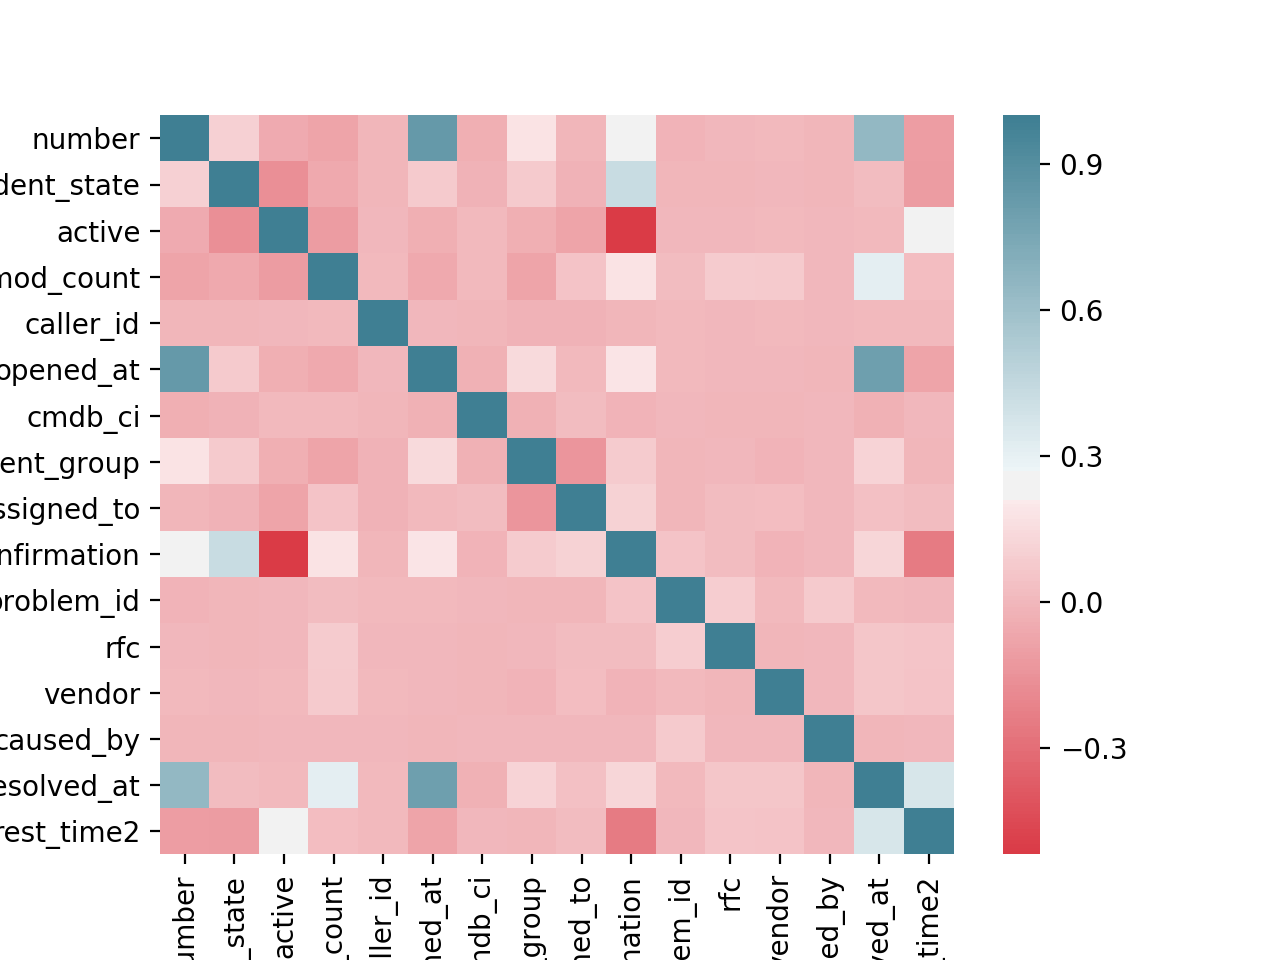

In [46]:
df2.plot.scatter(x="sys_updated_at",y="closed_at")

In [ ]:
# Obviously, those two column is a linear regression, so when choosing the target, "closed_at" 
# column is better as it doesn't have "?" value.

In [47]:
# 删除空值很多的列
df3 = df2.drop(["problem_id","cmdb_ci","rfc","vendor","caused_by"],axis = 1)

In [48]:
df3.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                   int64
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at              int64
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
closed_code                object
resolved_by                object
resolved_at   

In [49]:
df3.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,1457254800


In [151]:
df4 = df.drop(["problem_id","cmdb_ci","rfc","vendor","caused_by"],axis = 1)

In [50]:
df2["rest_time2"] = df2.apply(lambda x: x["closed_at"] - x["sys_updated_at"], axis=1)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,rest_time2
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600,470220
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600,443220
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600,433860
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,1457175600,0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1456822320,1457254800,536580


In [52]:
df = df2.drop(["sys_updated_at","closed_at"],axis = 1)

In [53]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,rest_time2
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,470220
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,443220
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,433860
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,1456741740,0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1456822320,536580


## 把所有的列都改成label encoder

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
def convert(data,column):
    number = LabelEncoder()
    data[column] = number.fit_transform(data[column])
    data=data.fillna(-999)
    return data

In [56]:
column = [columns for columns in df]
for i in range(0,len(column)):
    if df[str(column[i])].dtypes == "O":
        convert(df,str(column[i]))
    elif df[str(column[i])].dtypes == "bool":
        convert(df,str(column[i]))

In [57]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,rest_time2
0,0,7,1,0,0,0,1,1412,200,1456704960,...,0,0,0,0,0,0,13,52,1456741740,470220
1,0,8,1,0,0,2,1,1412,200,1456704960,...,0,0,0,0,0,0,13,52,1456741740,443220
2,0,8,1,0,0,3,1,1412,200,1456704960,...,0,0,0,0,0,0,13,52,1456741740,433860
3,0,6,0,0,0,4,1,1412,200,1456704960,...,0,0,0,0,0,0,13,52,1456741740,0
4,1,7,1,0,0,0,1,1412,121,1456717200,...,0,0,0,0,0,0,13,197,1456822320,536580


In [58]:
df["incident_state"].dtypes

dtype('int64')

# Decision tree

In [59]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {#"n_estimators" : 30
                  "max_features"  :  29,
                  "max_depth"     :  50,}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9494777668276139

# random forest

In [60]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {"n_estimators" : 30,
                  "max_features"  :  29,
                  "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9736542414538393

In [169]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color = 'red')

<IPython.core.display.Javascript object>

ValueError: x and y must be the same size

## gridsearch

In [1]:
from sklearn.model_selection import GridSearchCV

algorithm2 = RandomForestRegressor()
hyperparameters = {
    "n_estimators" : [10,25,50],
    "max_depth"    : [10,20,30],
    "max_features" : [25,35,45]
}

grid_optimization = GridSearchCV(algorithm2, 
                                     hyperparameters, 
                                     cv=5, 
                                     iid=False, )

scores = grid_optimization.fit(X_train, Y_train)

scores.best_score_ , scores.best_estimator_

NameError: name 'RandomForestRegressor' is not defined

In [134]:
scores.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [125]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

In [ ]:
n_estimators = [50, 75, 100]
max_depth = [5, 10, 20]
max_features = [5, 8, 10]

In [127]:
plot_grid_search(scores.cv_results_, max_depth, max_features, 'Max Depth', 'Max Features')

NameError: name 'scores' is not defined

## feature importance

In [61]:
feature_list = list(df.columns)

# Get numerical feature importances
importances = list(algorithme.feature_importances_)

In [62]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
 
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: resolved_at          Importance: 0.46
Variable: sys_mod_count        Importance: 0.16
Variable: number               Importance: 0.1
Variable: u_priority_confirmation Importance: 0.1
Variable: opened_at            Importance: 0.08
Variable: active               Importance: 0.03
Variable: incident_state       Importance: 0.01
Variable: caller_id            Importance: 0.01
Variable: assignment_group     Importance: 0.01
Variable: assigned_to          Importance: 0.01
Variable: reassignment_count   Importance: 0.0
Variable: reopen_count         Importance: 0.0
Variable: made_sla             Importance: 0.0
Variable: opened_by            Importance: 0.0
Variable: sys_created_by       Importance: 0.0
Variable: sys_created_at       Importance: 0.0
Variable: sys_updated_by       Importance: 0.0
Variable: contact_type         Importance: 0.0
Variable: location             Importance: 0.0
Variable: category             Importance: 0.0
Variable: subcategory          Importance: 0.0
Va

In [200]:
# list of x locations for plotting
x_values = list(range(len(importances)))
 
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
 
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
 
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Text(0.5, 1.0, 'Variable Importances')

In [64]:
df_final = df.drop(["reassignment_count","reopen_count","made_sla","opened_by","sys_created_by",
               "sys_created_at","sys_updated_by","contact_type","location","category",
               "subcategory","u_symptom","impact","urgency","priority","knowledge",
               "notify","closed_code","resolved_by"],axis = 1)

In [66]:
X = df_final.iloc[:,:-1]

y = df_final["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {"n_estimators" : 30,
                  "max_features"  :  10,
                  "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9714987880177195

In [67]:
import seaborn as sns
matriceDeCorrelation = df_final.corr()

sns.heatmap(matriceDeCorrelation, cmap = sns.diverging_palette(10,220, n = 200))